In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
bucket = "aws-wep-sagemaker/dataset"
data_key = "Base.csv"
data_location = "s3://{}/{}".format(bucket, data_key)

In [5]:
baf_df = pd.read_csv(data_location)
baf_df.drop("month", axis=1, inplace=True)
baf_df

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:283: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,26,0,200.0,0,INTERNET,3.743048,other,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,31,0,1500.0,0,INTERNET,16.967770,other,0,1,0
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,-1,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,31,0,200.0,0,INTERNET,16.068595,other,0,1,0
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,1,0,200.0,0,INTERNET,1.378683,linux,1,1,0


In [3]:
#without aws bucket
baf_df = pd.read_csv("Base.csv")
baf_df.drop("month", axis=1, inplace=True)
baf_df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,26,0,200.0,0,INTERNET,3.743048,other,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,31,0,1500.0,0,INTERNET,16.967770,other,0,1,0
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,-1,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,31,0,200.0,0,INTERNET,16.068595,other,0,1,0
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,1,0,200.0,0,INTERNET,1.378683,linux,1,1,0


In [6]:
baf_df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0


In [7]:
baf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [9]:
baf_df["fraud_bool"].value_counts()

0    988971
1     11029
Name: fraud_bool, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
columns = ["employment_status", "housing_status", "source", "device_os"]
for col in columns:
    le = LabelEncoder()
    baf_df[col] = le.fit_transform(baf_df[col])
    encoders[col] = le
baf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [10]:
baf_df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [13]:
(baf_df["current_address_months_count"] == -1).sum()

4254

<Axes: ylabel='Frequency'>

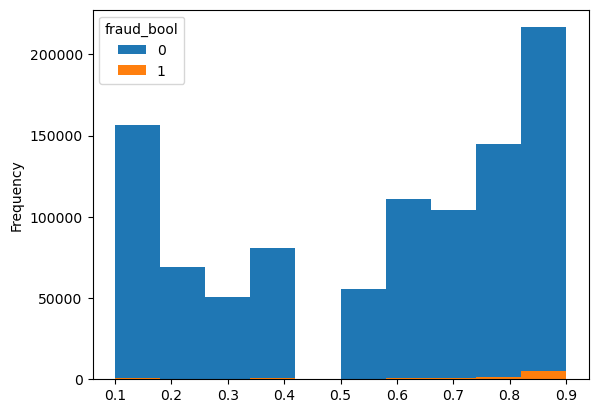

In [13]:
baf_df.pivot(columns="fraud_bool", values="income").plot.hist()

<Axes: ylabel='Frequency'>

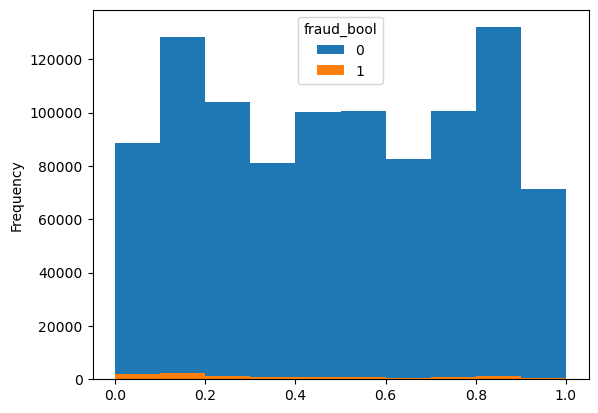

In [14]:
baf_df.pivot(columns="fraud_bool", values="name_email_similarity").plot.hist()

<Axes: ylabel='Frequency'>

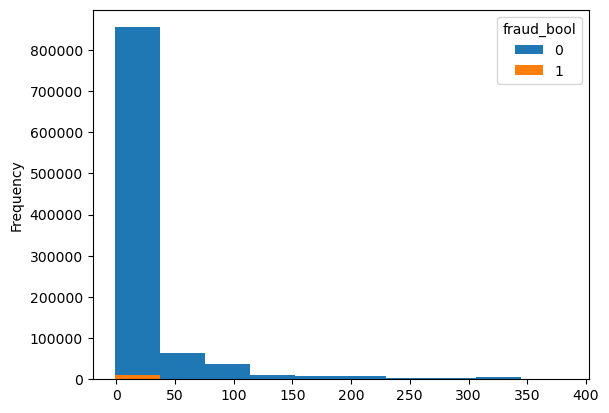

In [15]:
baf_df.pivot(columns="fraud_bool", values="prev_address_months_count").plot.hist()

<Axes: ylabel='Frequency'>

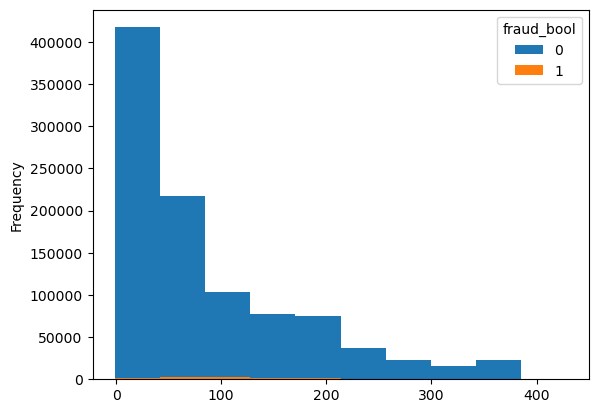

In [16]:
baf_df.pivot(columns="fraud_bool", values="current_address_months_count").plot.hist()

In [7]:
median = baf_df.loc[baf_df["current_address_months_count"] != -1, "current_address_months_count"].median()
baf_df["current_address_months_count"].replace(-1, median, inplace=True)
(baf_df["current_address_months_count"] == -1).sum()

C:\Users\nichelle\AppData\Local\Temp\ipykernel_35476\984099567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  baf_df["current_address_months_count"].replace(-1, median, inplace=True)


np.int64(0)

<Axes: ylabel='Frequency'>

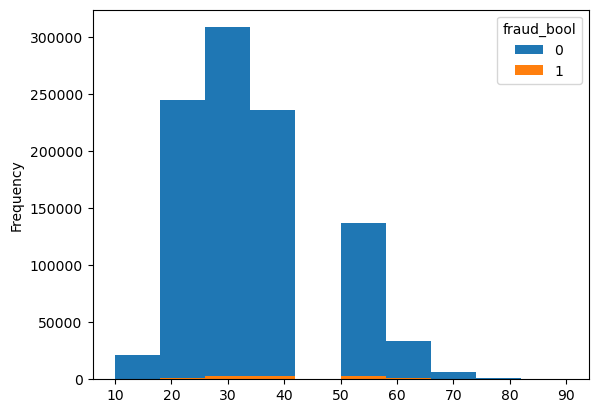

In [17]:
baf_df.pivot(columns="fraud_bool", values="customer_age").plot.hist()

<Axes: ylabel='Frequency'>

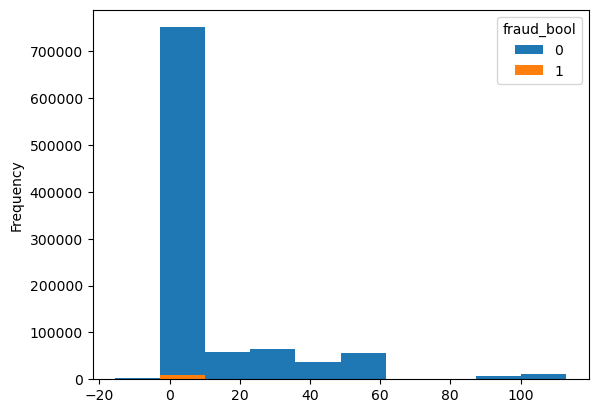

In [18]:
baf_df.pivot(columns="fraud_bool", values="intended_balcon_amount").plot.hist()

<Axes: ylabel='Frequency'>

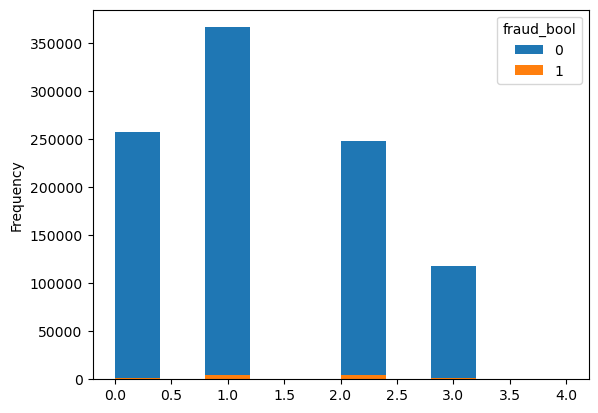

In [19]:
baf_df.pivot(columns="fraud_bool", values="payment_type").plot.hist()

<Axes: ylabel='Frequency'>

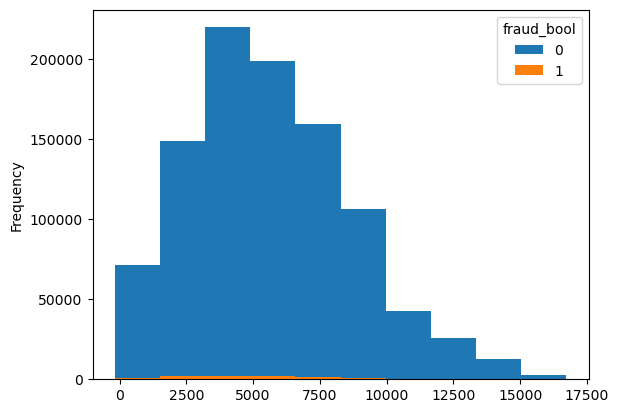

In [20]:
baf_df.pivot(columns="fraud_bool", values="velocity_6h").plot.hist()

<Axes: ylabel='Frequency'>

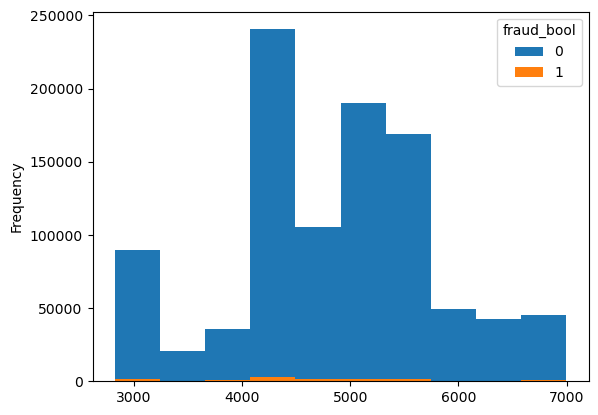

In [21]:
baf_df.pivot(columns="fraud_bool", values="velocity_4w").plot.hist()

<Axes: ylabel='Frequency'>

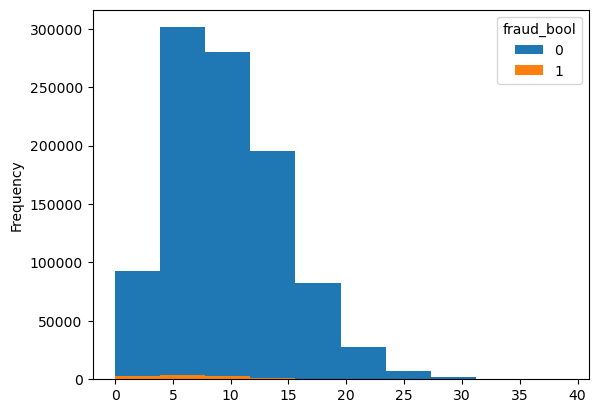

In [22]:
baf_df.pivot(columns="fraud_bool", values="date_of_birth_distinct_emails_4w").plot.hist()

<Axes: ylabel='Frequency'>

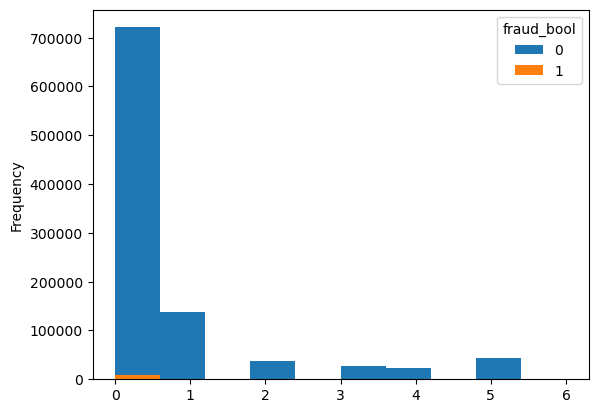

In [23]:
baf_df.pivot(columns="fraud_bool", values="employment_status").plot.hist()

<Axes: ylabel='Frequency'>

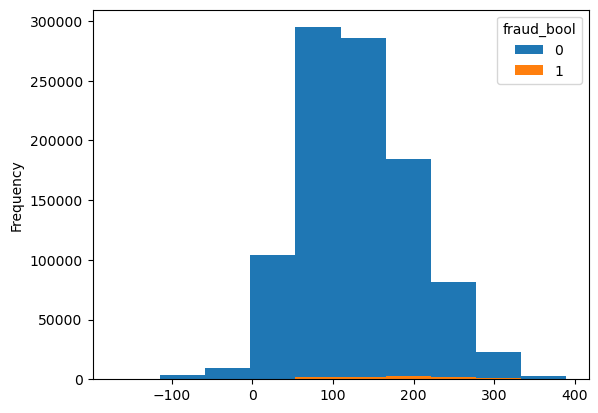

In [24]:
baf_df.pivot(columns="fraud_bool", values="credit_risk_score").plot.hist()

<Axes: ylabel='Frequency'>

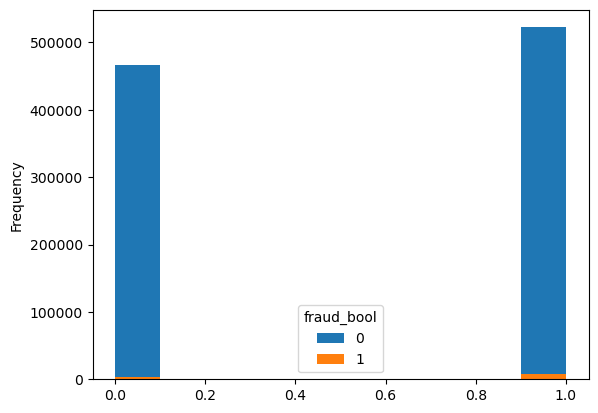

In [25]:
baf_df.pivot(columns="fraud_bool", values="email_is_free").plot.hist()

<Axes: ylabel='Frequency'>

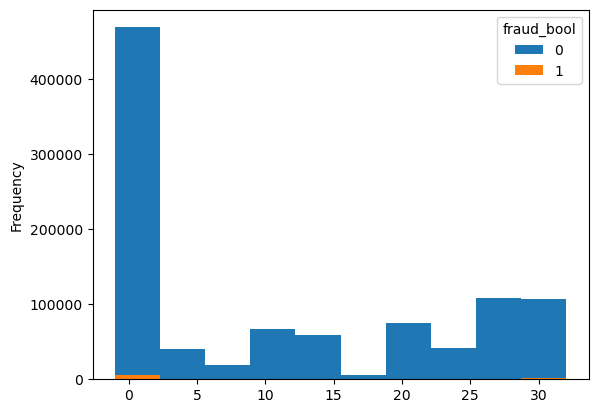

In [26]:
baf_df.pivot(columns="fraud_bool", values="bank_months_count").plot.hist()

<Axes: ylabel='Frequency'>

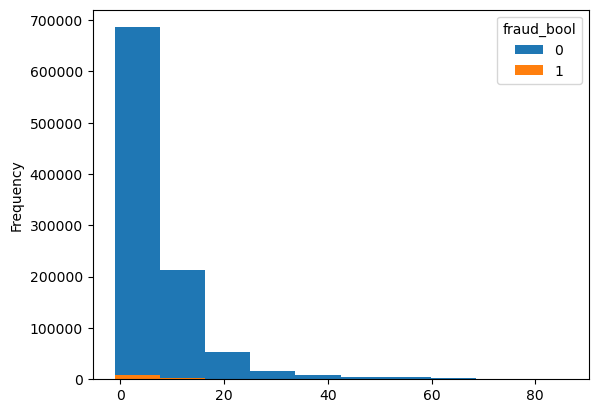

In [27]:
baf_df.pivot(columns="fraud_bool", values="session_length_in_minutes").plot.hist()

<Axes: ylabel='Frequency'>

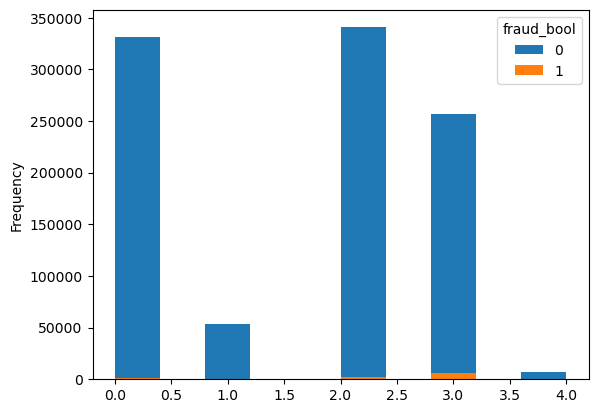

In [28]:
baf_df.pivot(columns="fraud_bool", values="device_os").plot.hist()

<Axes: ylabel='Frequency'>

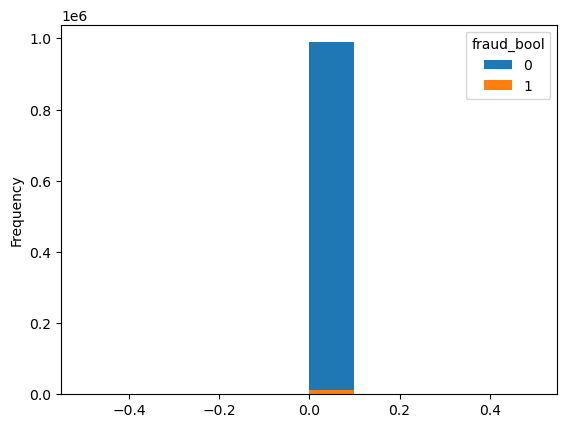

In [29]:
baf_df.pivot(columns="fraud_bool", values="device_fraud_count").plot.hist()

In [26]:
colors = ["green", "red"]
fb = [0, 1]

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


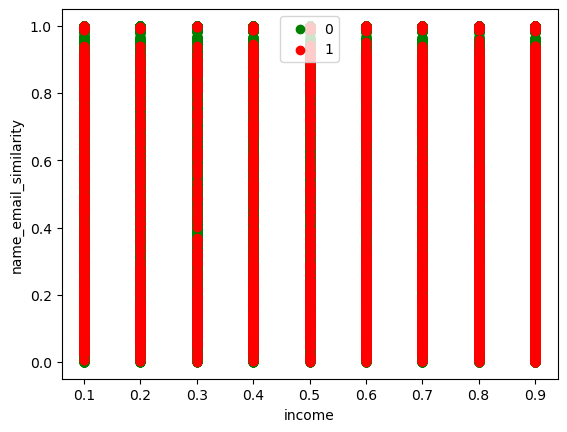

In [31]:
for i in range(2):
    z = baf_df[baf_df["fraud_bool"] == fb[i]]
    plt.scatter(z["income"], z["name_email_similarity"], c = colors[i], label=fb[i])
plt.xlabel("income")
plt.ylabel("name_email_similarity")
plt.legend()

Text(0, 0.5, 'current_address_months_count')

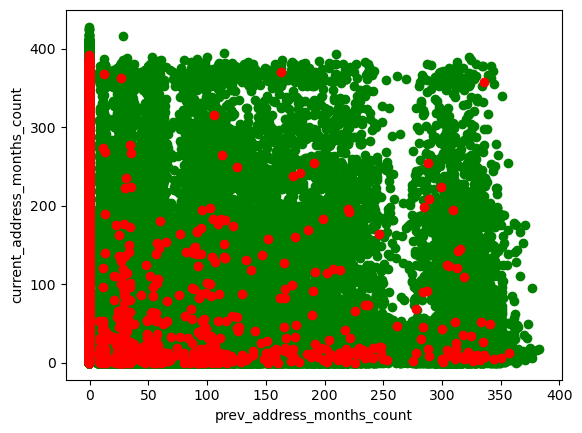

In [27]:
for i in range(2):
    z = baf_df[baf_df["fraud_bool"] == fb[i]]
    plt.scatter(z["prev_address_months_count"], z["current_address_months_count"], c = colors[i])
plt.xlabel("prev_address_months_count")
plt.ylabel("current_address_months_count")

Text(0, 0.5, 'days_since_request')

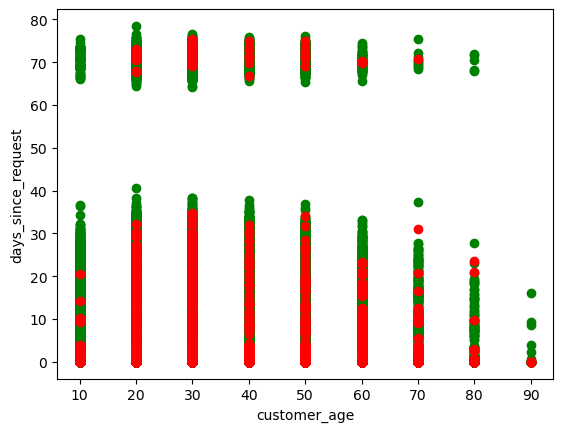

In [33]:
for i in range(2):
    z = baf_df[baf_df["fraud_bool"] == fb[i]]
    plt.scatter(z["customer_age"], z["days_since_request"], c = colors[i])
plt.xlabel("customer_age")
plt.ylabel("days_since_request")

Text(0, 0.5, 'payment_type')

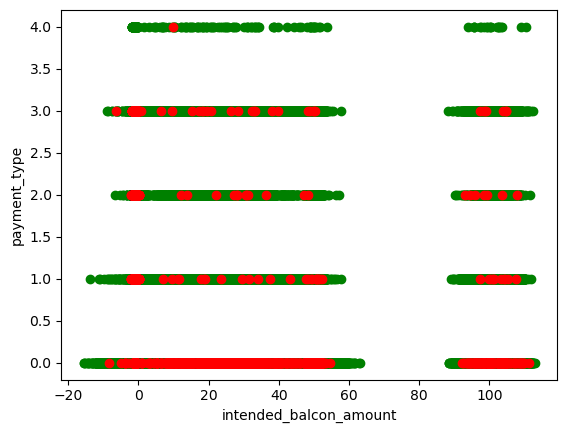

In [34]:
for i in range(2):
    z = baf_df[baf_df["fraud_bool"] == fb[i]]
    plt.scatter(z["intended_balcon_amount"], z["payment_type"], c = colors[i])
plt.xlabel("intended_balcon_amount")
plt.ylabel("payment_type")

Text(0, 0.5, 'velocity_6h')

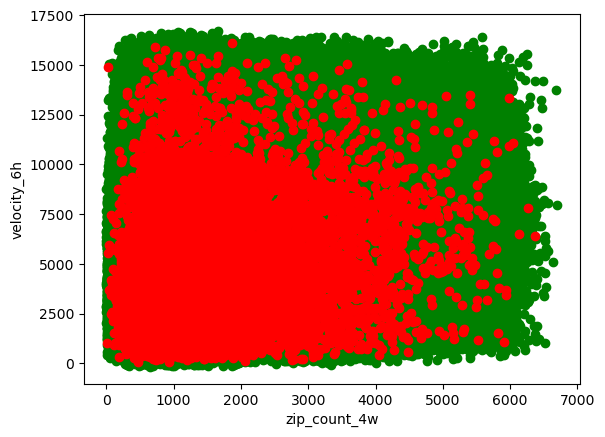

In [35]:
for i in range(2):
    z = baf_df[baf_df["fraud_bool"] == fb[i]]
    plt.scatter(z["zip_count_4w"], z["velocity_6h"], c = colors[i])
plt.xlabel("zip_count_4w")
plt.ylabel("velocity_6h")

Text(0, 0.5, 'velocity_4w')

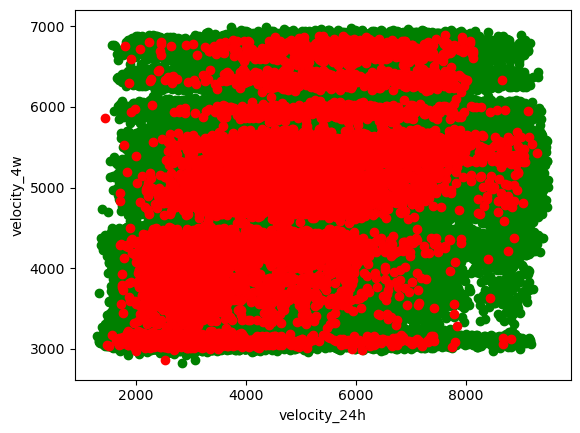

In [36]:
for i in range(2):
    z = baf_df[baf_df["fraud_bool"] == fb[i]]
    plt.scatter(z["velocity_24h"], z["velocity_4w"], c = colors[i])
plt.xlabel("velocity_24h")
plt.ylabel("velocity_4w")

Text(0, 0.5, 'date_of_birth_distinct_emails_4w')

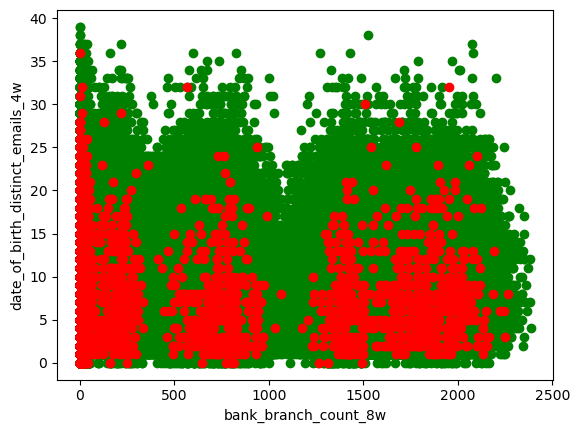

In [37]:
for i in range(2):
    z = baf_df[baf_df["fraud_bool"] == fb[i]]
    plt.scatter(z["bank_branch_count_8w"], z["date_of_birth_distinct_emails_4w"], c = colors[i])
plt.xlabel("bank_branch_count_8w")
plt.ylabel("date_of_birth_distinct_emails_4w")

Text(0, 0.5, 'housing_status')

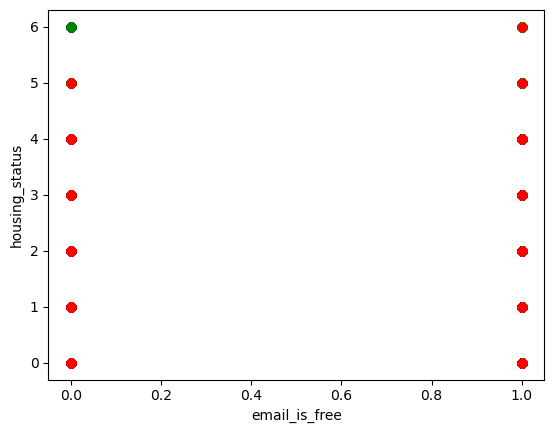

In [38]:
for i in range(2):
    z = baf_df[baf_df["fraud_bool"] == fb[i]]
    plt.scatter(z["email_is_free"], z["housing_status"], c = colors[i])
plt.xlabel("email_is_free")
plt.ylabel("housing_status")

Text(0, 0.5, 'phone_mobile_valid')

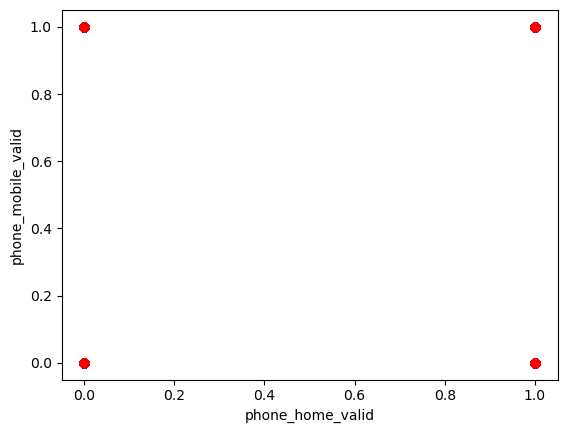

In [39]:
for i in range(2):
    z = baf_df[baf_df["fraud_bool"] == fb[i]]
    plt.scatter(z["phone_home_valid"], z["phone_mobile_valid"], c = colors[i])
plt.xlabel("phone_home_valid")
plt.ylabel("phone_mobile_valid")

Text(0, 0.5, 'has_other_cards')

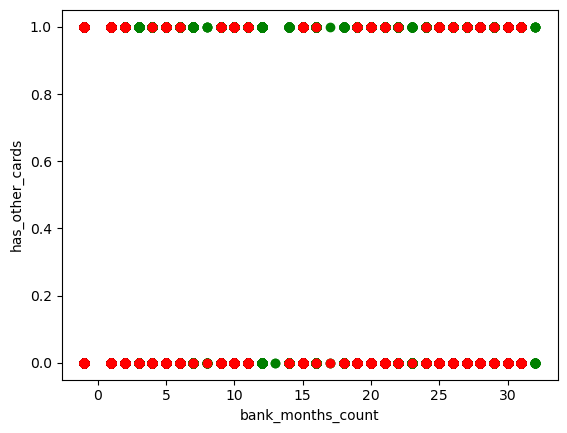

In [40]:
for i in range(2):
    z = baf_df[baf_df["fraud_bool"] == fb[i]]
    plt.scatter(z["bank_months_count"], z["has_other_cards"], c = colors[i])
plt.xlabel("bank_months_count")
plt.ylabel("has_other_cards")

Text(0, 0.5, 'device_fraud_count')

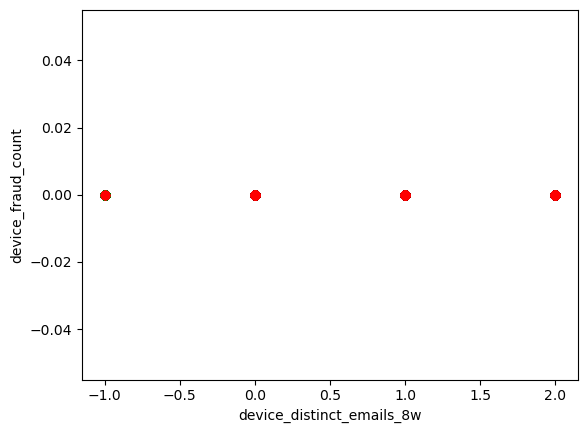

In [41]:
for i in range(2):
    z = baf_df[baf_df["fraud_bool"] == fb[i]]
    plt.scatter(z["device_distinct_emails_8w"], z["device_fraud_count"], c = colors[i])
plt.xlabel("device_distinct_emails_8w")
plt.ylabel("device_fraud_count")

In [28]:
baf_df.corr()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count
fraud_bool,1.000000,0.045079,-0.036720,-0.026031,0.033569,0.062959,0.000567,-0.024524,0.028304,0.005212,...,-0.003222,-0.035156,0.068907,0.016885,0.003922,0.008999,0.057834,-0.050296,0.035704,NaN
income,0.045079,1.000000,-0.038519,0.018209,-0.036871,0.125822,-0.015877,0.059046,-0.014319,-0.080581,...,-0.004514,0.086861,0.108868,0.011452,-0.009337,-0.055430,0.056674,-0.043584,-0.009992,NaN
name_email_similarity,-0.036720,-0.038519,1.000000,-0.018186,0.050101,-0.048902,-0.007736,0.029040,-0.001458,0.025114,...,-0.006351,0.011021,0.073159,-0.015224,-0.007437,0.005998,0.049227,0.014342,-0.017804,NaN
prev_address_months_count,-0.026031,0.018209,-0.018186,1.000000,-0.270199,-0.069178,0.078107,-0.009428,0.030764,-0.029638,...,-0.045550,-0.042949,-0.028474,0.019242,-0.009320,0.051425,-0.038202,0.031672,0.011924,NaN
current_address_months_count,0.033569,-0.036871,0.050101,-0.270199,1.000000,0.142375,-0.057420,0.057030,-0.057831,0.046854,...,0.071860,0.060186,0.130314,-0.012320,0.009087,-0.033256,0.071783,-0.050480,-0.000738,NaN
customer_age,0.062959,0.125822,-0.048902,-0.069178,0.142375,1.000000,-0.035999,-0.013000,-0.027268,-0.014176,...,0.012907,0.108743,0.148857,-0.001606,0.024412,0.025049,0.019043,-0.024272,0.025709,NaN
days_since_request,0.000567,-0.015877,-0.007736,0.078107,-0.057420,-0.035999,1.000000,0.019782,-0.004464,0.000249,...,-0.027460,-0.048861,-0.068670,0.001066,0.016786,0.049613,-0.014432,0.000337,0.009025,NaN
intended_balcon_amount,-0.024524,0.059046,0.029040,-0.009428,0.057030,-0.013000,0.019782,1.000000,-0.536142,0.002251,...,0.178374,0.096676,0.057860,0.007933,-0.013183,0.022811,0.013394,-0.020689,-0.019910,NaN
payment_type,0.028304,-0.014319,-0.001458,0.030764,-0.057831,-0.027268,-0.004464,-0.536142,1.000000,0.007002,...,-0.291345,-0.136785,-0.004186,0.006640,0.022190,-0.005837,-0.018212,0.018602,0.022241,NaN
zip_count_4w,0.005212,-0.080581,0.025114,-0.029638,0.046854,-0.014176,0.000249,0.002251,0.007002,1.000000,...,0.053637,-0.015015,-0.011651,0.017212,-0.002298,0.039687,-0.026802,0.022283,0.020550,NaN


<Axes: >

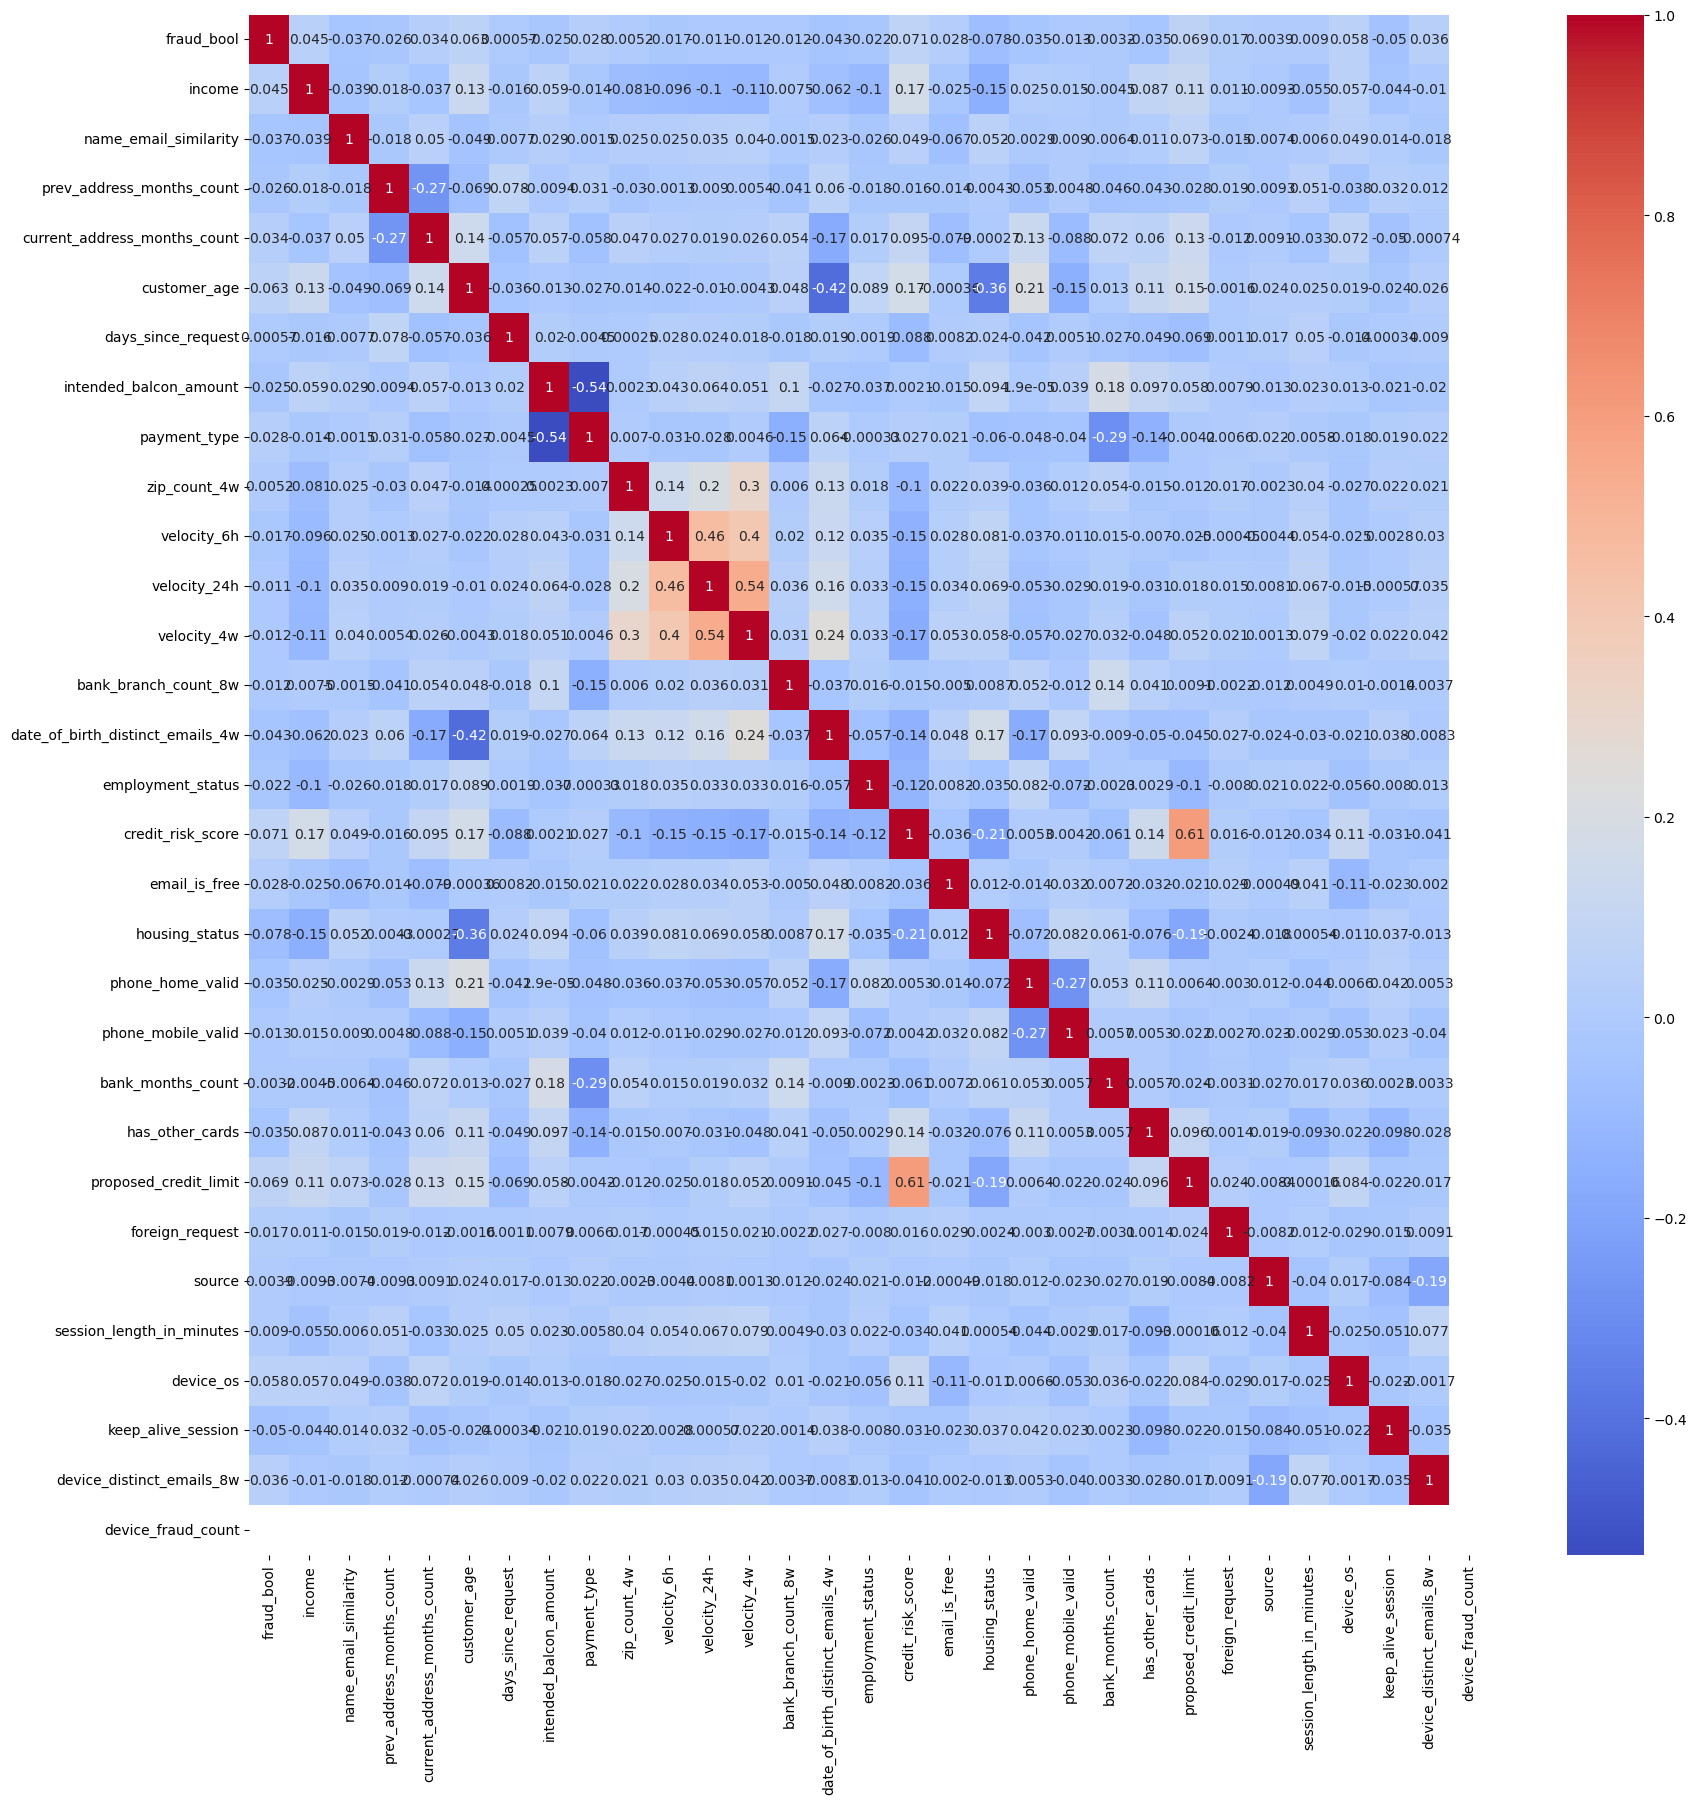

In [29]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(baf_df.corr(), annot=True, ax=ax, cmap="coolwarm")

In [8]:
baf_df.drop("credit_risk_score", axis=1, inplace=True)
baf_df.drop("velocity_4w", axis=1, inplace=True)
baf_df.drop("payment_type", axis=1, inplace=True)
baf_df.drop("device_fraud_count", axis=1, inplace=True)
baf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   zip_count_4w                      1000000 non-null  int64  
 9   velocity_6h                       1000000 non-null  float64
 10  velocity_24h                      1000000 non-null  float64
 11  bank_branch_count_8w              1000

In [22]:
x = baf_df.drop("fraud_bool", axis=1)
y = baf_df["fraud_bool"]
x.shape, y.shape

((1000000, 26), (1000000,))

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set shape: ", x_train.shape, y_train.shape)
print("Testing set shape: ", x_test.shape, y_test.shape)

Training set shape:  (800000, 26) (800000,)
Testing set shape:  (200000, 26) (200000,)


In [24]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [25]:
logr.fit(x_train, y_train)

c:\Users\nichelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
print("Logistic Regression Accuracy: ", logr.score(x_test, y_test)*100)

Logistic Regression Accuracy:  98.9455


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [61]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [62]:
print("K Nearest Neighbors Accuracy: ", knn.score(x_test, y_test)*100)

K Nearest Neighbors Accuracy:  98.9345


In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [68]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
print("Decision Tree Accuracy: ", dtree.score(x_test, y_test)*100)

Decision Tree Accuracy:  97.763


In [27]:
from sklearn.model_selection import cross_val_score

def classify(model):
    model.fit(x_train, y_train)
    score = cross_val_score(model, x, y, cv=10)
    print("Cross validation score: ", np.mean(score)*100)

In [28]:
classify(logr)

c:\Users\nichelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nichelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

Cross validation score:  98.89710000000001


c:\Users\nichelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
classify(knn)

Cross validation score:  98.8832


In [14]:
classify(dtree)

Cross validation score:  97.65790000000001


In [ ]:
# conclusion: best performing algorithm -> least performing
# logistic regression -> k nearest neighbors -> decision tree

In [16]:
new_input = [{"income": 0.6, "name_email_similarity": 0.986506310633034, "prev_address_months_count": -1, "current_address_months_count": 89, "customer_age": 20, "days_since_request": 0.0067353870811739, "intended_balcon_amount": 102.45371092469456, "zip_count_4w": 1204, "velocity_6h": 11556.955513727777, "velocity_24h": 7506.951275553085, "bank_branch_count_8w": 5, "date_of_birth_distinct_emails_4w": 5, "employment_status": 1, "email_is_free": 0, "housing_status": 1, "phone_home_valid": 1, "phone_mobile_valid": 0, "bank_months_count": 9, "has_other_cards": 0, "proposed_credit_limit": 1500.0, "foreign_request": 0, "source": 1, "session_length_in_minutes": 16.224843433978073, "device_os": 1, "keep_alive_session": 0, "device_distinct_emails_8w": 1}]
input_df = pd.DataFrame(new_input)

logr.predict(input_df)

array([0])

In [5]:
import joblib

In [ ]:
joblib.dump(logr, 'fraud_model.pkl')

In [6]:
joblib.dump(encoders, 'label_encoder.pkl')

['label_encoder.pkl']